In [6]:
# import dependencies
import pandas as pd
import random
import statistics
import numpy
import requests
import time
from openpyxl.workbook import Workbook
from openpyxl import load_workbook
import matplotlib.pyplot as plt

# import api key
from config import key

my_symbols = ['TSLA']
#local_time = time.localtime()
#date = time.strftime("%Y-%m-%d", local_time)
date = '2022-04-12'

In [7]:
base_url = 'https://api.polygon.io/v1/open-close/'

In [8]:
url_list = []

for symbol in my_symbols:
    url_list.append(f'{base_url}{symbol}/{date}/?adjusted=false&apiKey={key}')

In [9]:
res = []

for url in url_list:
    res.append(requests.get(url).json())

In [10]:
# lists that will create the df
stock_close = []
stock_open = []
percent_change = []
stock_symbol = []

In [11]:
for stock_info in res:
    for key, value in stock_info.items():
        if key == 'close':
            stock_close.append(value)
        if key == 'open':
            stock_open.append(value)
        if key == 'symbol':
            stock_symbol.append(value)

In [12]:
i = 0
length = len(stock_close)

while i < length:
    day_dif = stock_close[i] - stock_open[i]
    percent_change.append(day_dif / stock_close[i] * 100)
    
    i+=1

In [13]:
# create a dict
stock_dict = {
    'date': date,
    'open': stock_open,
    'close': stock_close,
    'percent change': percent_change
}

In [44]:
headers = ['Symbol', 'Date', 'Open Price', 'Close Price', 'Percentage Change']
workbook_name = 'testing.xlsx'
wb = Workbook()
page = wb.active
page.title = 'my_stocks'
page.append(headers)

wb.save(filename=workbook_name)

In [45]:
daily_stock = [stock_symbol[0], date, stock_open[0], stock_close[0], percent_change[0]]
daily_stock

['TSLA', '2022-04-12', 997.64, 986.95, -1.0831349105831036]

In [47]:
workbook_name = 'testing.xlsx'
wb = load_workbook(workbook_name)
page = wb.active

# new data to write
new_daily_stock = [daily_stock]

for info in new_daily_stock:
    page.append(info)

wb.save(filename=workbook_name)

In [14]:
# create a dataframe with all of this info
my_stocks_df = pd.DataFrame(stock_dict, index = stock_symbol)
my_stocks_df

,date,open,close,percent change
TSLA,2022-04-12,997.64,986.95,-1.083135


In [49]:
writer = pd.ExcelWriter('testing.xlsx')
my_stocks_df.to_excel(writer)

writer.save()

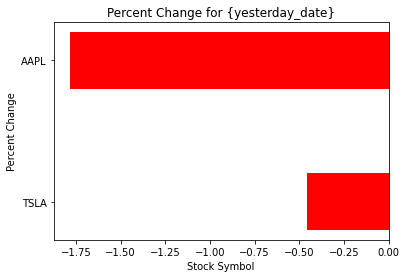

In [41]:
# create a horizontal bar chart that shows the percent change for each of the stocks to see which did the best
plt.barh(stock_symbol, height = 0.4, width = percent_change, color = 'r')
# annotate the chart
plt.title('Percent Change for {yesterday_date}')
plt.xlabel('Stock Symbol')
plt.ylabel('Percent Change')

# show the chart
plt.show()

In [42]:
# create a list to hold the stock_dict for each day
daily_stock_info = []
# create a list to hold the date for each day
days = []

In [13]:
daily_stock_info.append(stock_dict)
days.append(date)
daily_dict = {k:v for k,v in zip(days,daily_stock_info)}

# with open('dictionary_testing.txt', 'a') as f:
#     f.write('\n' f'{daily_dict}')

In [15]:
# with open('dictionary_testing.txt', 'w') as f:
#    f.write()